In [1]:
%load_ext autoreload
%autoreload 1

import sys
HOME='/mnt/home/llorente/'
#HOME='/home/cj/'
sys.path.append(HOME+'comp_structure_research')
sys.path.append(HOME+'comp_structure_research/stellar_mass_fraction')


In [2]:
import yt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Analysis for the Big Box 25 Mpc simulation at z = 2


In [3]:
%aimport HaloData
from HaloData import HaloData

dataset_fname  = "~/cosmo_bigbox/25Mpc_512/RD0111/RD0111"
halo_dat_fname = "halodata_RD0111.dat"
hd = HaloData.load_from_file(halo_dat_fname)


In [4]:
def DarkMatter(pfilter, data):
    filter = data[("all", "particle_type")] == 1 # DM = 1, Stars = 2
    return filter
    
yt.add_particle_filter("dark_matter", function=DarkMatter, filtered_type='all', \
                    requires=["particle_type"])

def stars(pfilter, data):
    filter = data[("all", "particle_type")] == 2 # DM = 1, Stars = 2
    return filter

yt.add_particle_filter("stars", function=stars, filtered_type='all', \
                       requires=["particle_type"])

ds = yt.load(dataset_fname)
ds.add_particle_filter('stars')
ds.add_particle_filter('dark_matter')
ad = ds.all_data()
(ad.right_edge-ad.left_edge).to('Mpc')

yt : [INFO     ] 2020-06-09 18:02:27,737 Parameters: current_time              = 154.50086626384
yt : [INFO     ] 2020-06-09 18:02:27,738 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2020-06-09 18:02:27,739 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-09 18:02:27,740 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-09 18:02:27,741 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-09 18:02:27,742 Parameters: current_redshift          = 2.0039999729143
yt : [INFO     ] 2020-06-09 18:02:27,743 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2020-06-09 18:02:27,743 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2020-06-09 18:02:27,744 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 142694/142694 [00:16<00:00, 8527.42it/s] 
yt : [INFO     ] 2020-06-09 18:02:51,086 Gathering a field list (this may take a moment.)


YTArray([11.97444186, 11.97444186, 11.97444186]) Mpc

# Stellar Mass Fraction for 25 Mpc Box at z = 0

In [5]:
ds.current_redshift

2.0039999729143

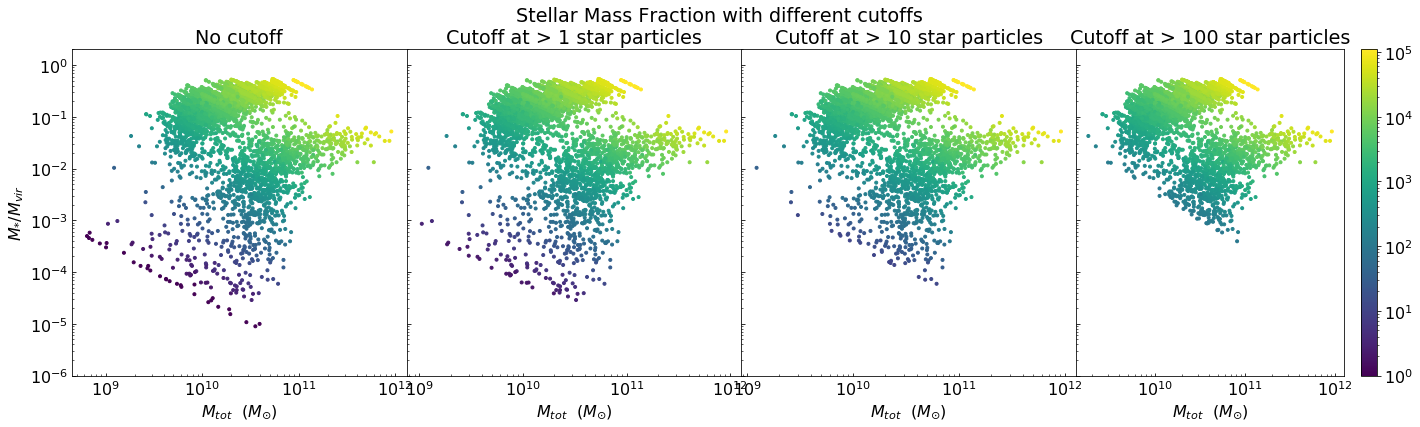

In [6]:

%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
#stellar_mass_fraction_scatter(halo_dat2_fname, cutoff=0)
stellar_mass_fraction_scatter_multi(hd)
#interact(stellar_mass_fraction_scatter, hd=fixed(hd), cutoff=(0, 1e3));

Stellar Mass Fraction of each halo, plotted against their total mass. The color represents the total number of star particles in each halo. 

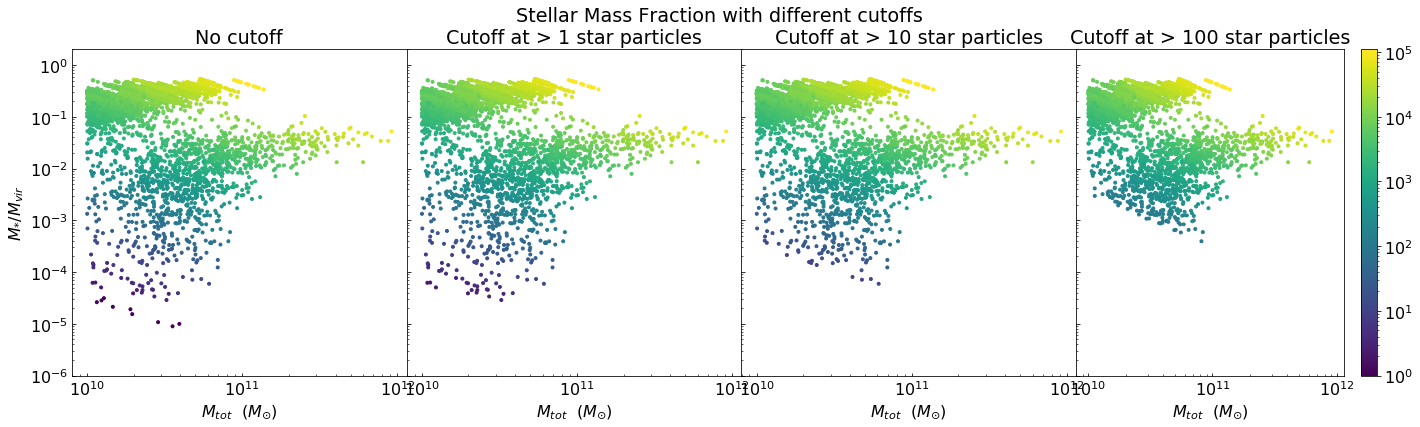

In [10]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_scatter_multi(hd, 1e10)

With halos < $10^{10} M_{\odot}$ filtered out

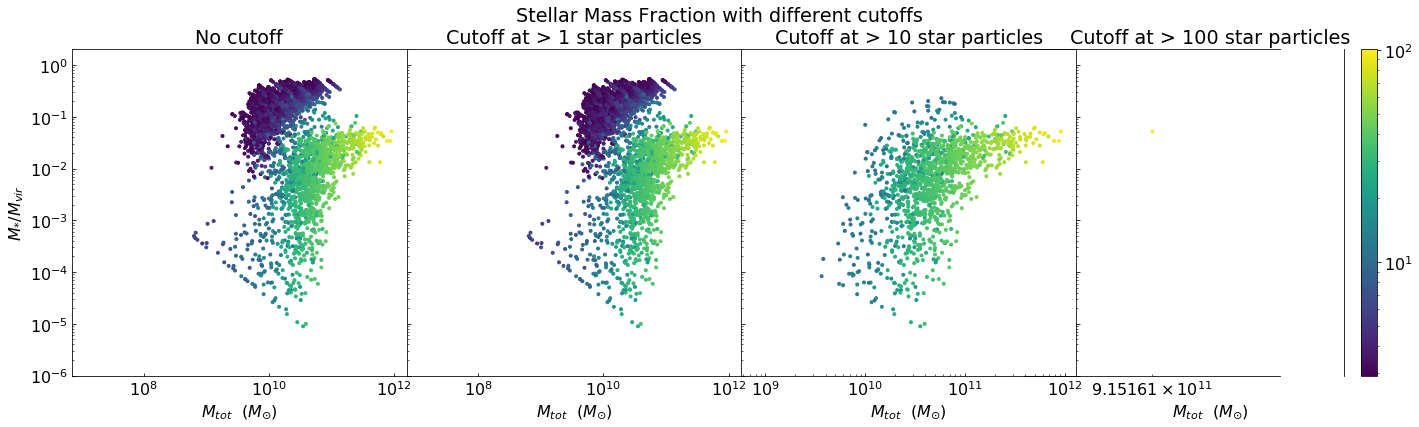

In [13]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_scatter_multi(hd, 1e1, Fields.RADIUS)

Same thing but now the colors show the virial radius of each halo. 

# Visual Inspection of Rockstar's Goddamn Motherfucking Bullshit

There's a large collection of very small halos around the location
```
(5.58, 4.49, 6.71) Mpc  
```
in the box with radii on the order of 1-10 kpc. So here's a box zoomed into that location with halos annotated to see what's really going on. 

Same as the above except that halos with mass less than a certain mass have been excluded. 




# Formula used to calculate stellar mass fraction:
$$
f = \frac{M_*}{\displaystyle \frac{\Omega_b}{\Omega_m} M_h}
$$

where
$M_*$ is total stellar mass in a halo

$\Omega_b$ is the cosmological baryon fraction

$\Omega_c$ is the cosmological (cold) dark matter fraction

$\Omega_m = \Omega_b + \Omega_c$

$M_h$ is the halo mass. Note: make sure we calculate halo mass the same way Behroozi does in Behroozi et al (2013)


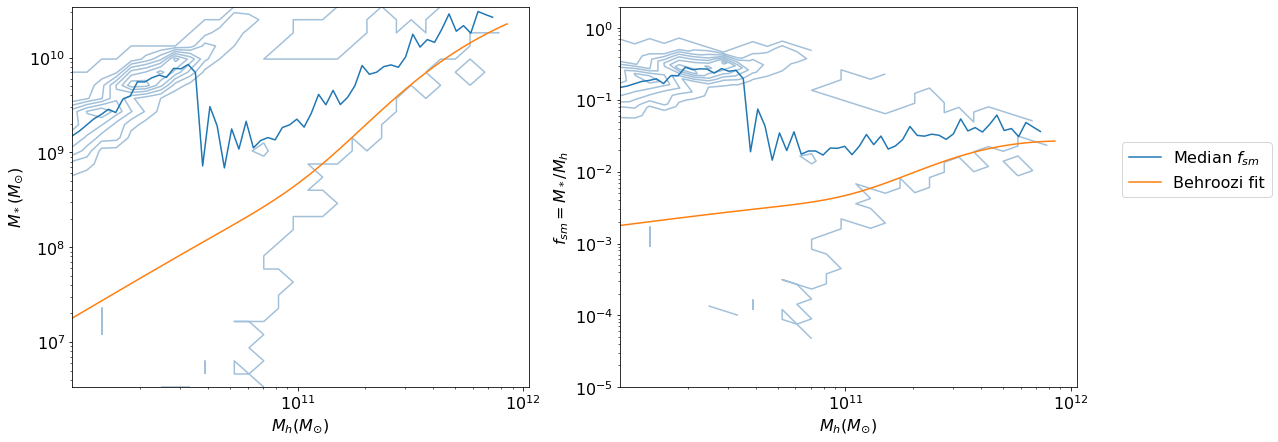

In [8]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_reduced(hd, 0, min_nstar=10, min_halo_mass=1e10)

Median values for stellar mass and stellar mass fraction compared to Behroozi fit function at $z=0$. 


    
The scale factor in Behroozi's paper is the cosmological scale factor given by
    $$
    a = \frac{1}{1+z}
    $$

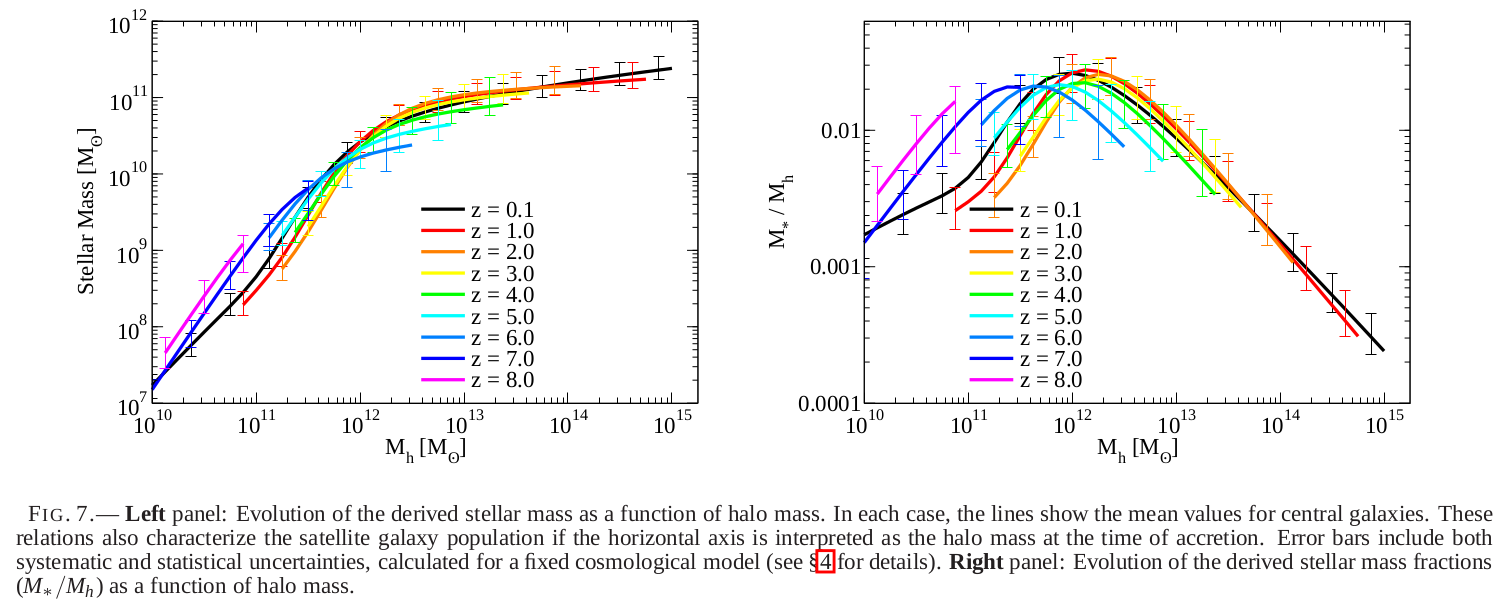

Behroozi describes his fit function as giving the *median* stellar mass for a given halo mass, but the caption in the image says that it gives the *mean* stellar mass. The data files themselves don't say one way or the other.

# Baryon Budget

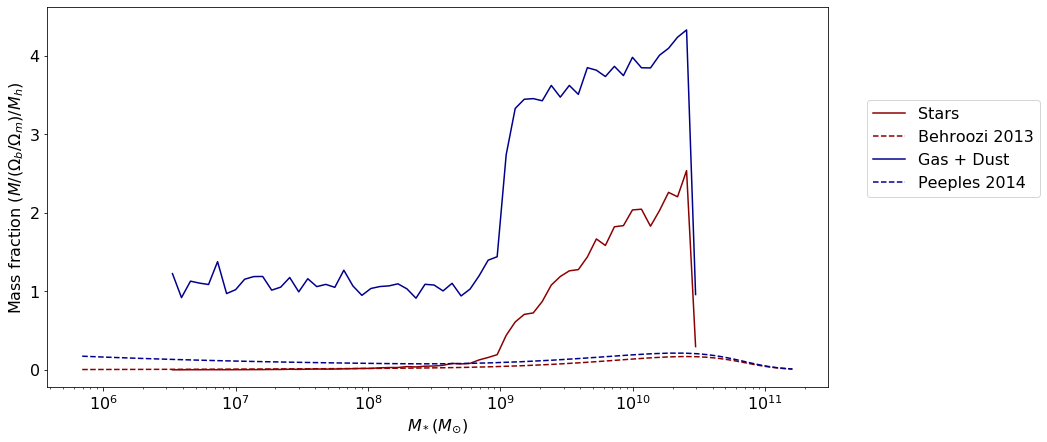

In [9]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

baryon_frac(hd, 0, min_nstar=10, min_halo_mass=1e10)

Peeples 2014 is an accounting of ISM gas and this selection includes all gas in the CGM, which is why the gas count appears so high. 